In [373]:
import pandas as pd
import re
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from numpy import pi, sin, cos

In [374]:
import os
directory = os.getcwd()

In [375]:
eda_data = pd.read_csv(directory+'/religion_data_for_EDA.csv',index_col=0)
eda_data = pd.DataFrame(eda_data)
#eda_data.dropna(axis=0, inplace=True)
eda_data[eda_data['CurrentRegion'].isna()]

Region                                               Name  \
1506         global  Church of Jesus Christ of Latter-day Saints (m...   
1507         global                         Digital Shinto Communities   
1508         global  International Society for Krishna Consciousnes...   
1509         global                                Jehovah's Witnesses   
1510         global                             Swaminarayan Sampraday   
1511         global                    The Church of Christ, Scientist   
1512         global  The International Network of Engaged Buddhists...   
1513         global  Universal Fellowship of Metropolitan Community...   
1514         global                                        Wesleyanism   
1515         global             Supreme Master Ching Hai World Society   
1516         global                           Temple of the Jedi Order   
1517      cybersect             Supreme Master Ching Hai World Society   
1518      cybersect                           Temple of the Jedi Order   
1519         global             The Yijing 易經 (The Classic of Changes)   
1748  international             The Yijing 易經 (The Classic of Changes)   
2644  transnational                                 Islamic modernists   
2645  transnational                     Maqāṣid al-šarī῾a al-islāmiyya   
2646  transnational                                  Secular Buddhists   
2647  transnational                      Tafsīr al-taḥrīr wa al-tanwīr   
2648  transnational             The Yijing 易經 (The Classic of Changes)   

                                     Source           TimeFrame  \
1506                              No Source   1951 CE - 2018 CE   
1507                              No Source   2001 CE - 2021 CE   
1508                              No Source   1966 CE - 2016 CE   
1509                              No Source   1870 CE - 2022 CE   
1510                              No Source   1800 CE - 2017 CE   
1511  Secondary source: Multiple References   1866 CE - 2020 CE   
1512                              No Source   1989 CE - 2022 CE   
1513                              No Source   1968 CE - 2020 CE   
1514                              No Source   1738 CE - 2020 CE   
1515                              No Source   1986 CE - 2018 CE   
1516             Supervised by: Robyn Walsh   2007 CE - 2020 CE   
1517                              No Source   1986 CE - 2018 CE   
1518             Supervised by: Robyn Walsh   2007 CE - 2020 CE   
1519           Expert source: Richard Smith  1554 BCE - 2021 CE   
1748           Expert source: Richard Smith  1554 BCE - 2021 CE   
2644                              No Source   1800 CE - 1980 CE   
2645                              No Source   1947 CE - 2022 CE   
2646                              No Source   1997 CE - 2022 CE   
2647                              No Source   1936 CE - 2022 CE   
2648           Expert source: Richard Smith  1554 BCE - 2021 CE   

                                             Attributes  ReligiousGroup  \
1506               Religious Group,Christian Traditions               1   
1507  Religious Group,Kami worship,Asian American Re...               1   
1508         Religious Group,Indic Religious Traditions               1   
1509  Religious Group,Apocalyptic Movements,American...               1   
1510         Religious Group,Indic Religious Traditions               1   
1511  Religious Group,Christian Traditions,New Relig...               1   
1512                Religious Group,Buddhist Traditions               1   
1513               Religious Group,Christian Traditions               1   
1514              Religious Group,Wesleyanism,Methodism               1   
1515  Religious Group,Buddhist Traditions,Christian ...               1   
1516  Religious Group,Transnational Cybersect,New Re...               1   
1517  Religious Group,Buddhist Traditions,Christian ...               1   
1518  Religious Group,Transnational Cybersect,New Re...               1   


In [376]:
# drop rows with na for the location data
# these are only the groups 
#for which the original source identified the location as being (global, cybersect, transnational, international)

rows_to_drop = eda_data[eda_data['CurrentRegion'].isna()]
eda_data = eda_data.drop(rows_to_drop.index, axis = 0)


In [377]:
eda_data[eda_data['CurrentRegion'].isna()]

Empty DataFrame
Columns: [Region, Name, Source, TimeFrame, Attributes, ReligiousGroup, ReligiousPlace, CleanedAttributes, Start_year, End_year, CurrentRegion, Latitude, Longitude, Continent]
Index: []

Below are a few rows that needed to be manually corrected after EDA, because the visualizations showed incorrect locations for these regions and landmarks.

In [378]:
# fix latitude/longitude for western samoans, shows up inside the ocean right now
eda_data[eda_data['CurrentRegion'].str.contains('Oceania')]

Region                        Name  \
2278     oceania                        Buka   
2279     oceania  Digital Shinto Communities   
2280     oceania                    Kiribati   
2281     oceania                       Mekeo   
2282     oceania                 Wesleyanism   
...          ...                         ...   
2359  micronesia                      Yapese   
2360  micronesia                      Yapese   
2362   polynesia                  Marquesans   
2363   polynesia                     Moriori   
2364   polynesia             Western Samoans   

                                     Source          TimeFrame  \
2278  Secondary source: Multiple References  1860 CE - 1885 CE   
2279                              No Source  2001 CE - 2021 CE   
2280  Secondary source: Multiple References  1795 CE - 1820 CE   
2281  Secondary source: Multiple References  1850 CE - 1875 CE   
2282                              No Source  1738 CE - 2020 CE   
...                                     ...                ...   
2359  Secondary source: Multiple References  1526 CE - 2003 CE   
2360  Secondary source: Multiple References  1885 CE - 1910 CE   
2362  Secondary source: Multiple References  1800 CE - 1875 CE   
2363  Secondary source: Multiple References  1810 CE - 1835 CE   
2364                     Data source: eHRAF  1804 CE - 1840 CE   

                                             Attributes  ReligiousGroup  \
2278                  Religious Group,Oceanic Religions               1   
2279  Religious Group,Kami worship,Asian American Re...               1   
2280                  Religious Group,Oceanic Religions               1   
2281                  Religious Group,Oceanic Religions               1   
2282              Religious Group,Wesleyanism,Methodism               1   
...                                                 ...             ...   
2359          Religious Group,Southeast Asian Religions               1   
2360                  Religious Group,Oceanic Religions               1   
2362                  Religious Group,Oceanic Religions               1   
2363                  Religious Group,Oceanic Religions               1   
2364                  Religious Group,Oceanic Religions               1   

      ReligiousPlace                                  CleanedAttributes  \
2278               0                              ['Oceanic Religions']   
2279               0  ['Kami worship', 'Asian American Religions', '...   
2280               0                              ['Oceanic Religions']   
2281               0                              ['Oceanic Religions']   
2282               0                       ['Wesleyanism', 'Methodism']   
...              ...                                                ...   
2359               0                      ['Southeast Asian Religions']   
2360               0                              ['Oceanic Religions']   
2362               0                              ['Oceanic Religions']   
2363               0                              ['Oceanic Religions']   
2364               0                              ['Oceanic Religions']   

      Start_year  End_year CurrentRegion   Latitude   Longitude Continent  
2278        1860      1885       Oceania -22.735910  140.018765   Oceania  
2279        2001      2021       Oceania -22.735910  140.018765   Oceania  
2280        1795      1820       Oceania -22.735910  140.018765   Oceania  
2281        1850      1875       Oceania -22.735910  140.018765   Oceania  
2282        1738      2020       Oceania -22.735910  140.018765   Oceania  
...          ...       ...           ...        ...         ...       ...  
2359        1526      2003       Oceania   7.425554  150.550812   Oceania  
2360        1885      1910       Oceania   7.425554  150.550812   Oceania  
2362        1800      1875       Oceania -16.839502 -148.371690   Oceania  
2363        1810      1835       Oceania -16.839502 -148.371690   Oceania  
23

In [379]:
eda_data[eda_data['CurrentRegion'].str.contains('Saudi')]

Region                                       Name     Source  \
289   arabian-peninsula  In the Shade of the Qur'an في ظلال القرآن  No Source   
290   arabian-peninsula                            Khazneh (Petra)  No Source   
291   arabian-peninsula                                     Najran  No Source   
292   arabian-peninsula                         Petra Great Temple  No Source   
293   arabian-peninsula                       Religion in Nabataea  No Source   
2397       saudi-arabia  In the Shade of the Qur'an في ظلال القرآن  No Source   
2398       saudi-arabia                       Religion in Nabataea  No Source   

              TimeFrame                                         Attributes  \
289   1951 CE - 2023 CE  Religious Group,Text,Qur'anic commentary (Tafs...   
290    100 BCE - 200 CE  Religious Group,Religious Place,Temple,Ancient...   
291     500 CE - 575 CE  Religious Group,Religious Place,Arabia,Archaeo...   
292    100 BCE - 200 CE  Religious Group,Religious Place,Temple,Roman R...   
293    300 BCE - 450 CE  Religious Group,Ancient Mediterranean,Tomb,Pet...   
2397  1951 CE - 2023 CE  Religious Group,Text,Qur'anic commentary (Tafs...   
2398   300 BCE - 450 CE  Religious Group,Ancient Mediterranean,Tomb,Pet...   

      ReligiousGroup  ReligiousPlace  \
289                1               0   
290                1               1   
291                1               1   
292                1               1   
293                1               0   
2397               1               0   
2398               1               0   

                                      CleanedAttributes  Start_year  End_year  \
289   ['Text', "Qur'anic commentary (Tafsir)", 'Isla...        1951      2023   
290   ['Temple', 'Ancient Mediterranean', 'Tomb', 'G...        -100       200   
291   ['Arabia', 'Archaeological Site', 'Early Chris...         500       575   
292   ['Temple', 'Roman Religions', 'Arabian Religio...        -100       200   
293   ['Ancient Mediterranean', 'Tomb', 'Petra', 'Na...        -300       450   
2397  ['Text', "Qur'anic commentary (Tafsir)", 'Isla...        1951      2023   
2398  ['Ancient Mediterranean', 'Tomb', 'Petra', 'Na...        -300       450   

     CurrentRegion   Latitude  Longitude Continent  
289   Saudi Arabia  19.491411  47.449040      Asia  
290   Saudi Arabia  19.491411  47.449040      Asia  
291   Saudi Arabia  19.491411  47.449040      Asia  
292   Saudi Arabia  19.491411  47.449040      Asia  
293   Saudi Arabia  19.491411  47.449040      Asia  
2397  Saudi Arabia  23.885942  45.079162      Asia  
2398  Saudi Arabia  23.885942  45.079162      Asia

From above I can see that the row 2362,2363 and 2364 have the incorrect latitude/longitude mapping (landing in the ocean). 

In [380]:
eda_data.loc[[2362,2363,2364], 'Latitude'] = -22.735910
eda_data.loc[[2362,2363,2364], 'Longitude'] = 140.018765

In [381]:
#bt = eda_data[eda_data['Name'].str.contains('Masjed')]

In [382]:
#fix the location of Kaaba. Appears in the center of Asia right now, since the orginal source had the region information mapped 
# to Asia and not a specific country in Asia.
index_to_update_kaa = eda_data[eda_data['Name'].str.contains('al-Masjed')].index.tolist()
eda_data.loc[index_to_update_kaa, 'CurrentRegion'] = 'Saudi Arabia'
eda_data.loc[index_to_update_kaa, 'Latitude'] = 23.885942
eda_data.loc[index_to_update_kaa, 'Longitude'] = 45.079162

In [383]:
index_list_for_update= eda_data[eda_data['CurrentRegion'].str.contains('Persian Gulf')].index.tolist()

# region name is too long on the polar graph below, shortening the name here. 
eda_data.loc[index_list_for_update, 'CurrentRegion'] = 'Arabian Gulf'

In [384]:
index_list_for_update2= eda_data[eda_data['CurrentRegion'].str.contains('Congo')].index.tolist()
# region name is too long on the polar graph below, shortening the name here. 
eda_data.loc[index_list_for_update2, 'CurrentRegion'] = 'Congo'

In [385]:
#CurrentRegion contains both USA and United States, fixing here
eda_data[eda_data['CurrentRegion'].str.contains('USA')]

Empty DataFrame
Columns: [Region, Name, Source, TimeFrame, Attributes, ReligiousGroup, ReligiousPlace, CleanedAttributes, Start_year, End_year, CurrentRegion, Latitude, Longitude, Continent]
Index: []

In [386]:
counts = eda_data['Continent'].value_counts()
eda_data['count_by_continent'] = eda_data['Continent'].map(counts)

counts_region = eda_data['CurrentRegion'].value_counts()
eda_data['count_by_region'] = eda_data['CurrentRegion'].map(counts_region)

In [433]:
# color mapping so the colors match with the colors used in geo plots for each continent.
color_list = px.colors.qualitative.Pastel[0:6]
color_map_to_continent = { 'Asia':color_list[0], 'Africa':color_list[1],'North America':color_list[2],
                          'Europe':color_list[3],'Oceania':color_list[4],'South America':color_list[5]
    
}
color_map_to_continent['Asia']

'rgb(102, 197, 204)'

In [435]:
eda_data['color_by_continent'] = eda_data['Continent'].apply(lambda x: color_map_to_continent[x])
eda_data

Region                                               Name  \
0         afghanistan                                      Chishti Sufis   
1              africa                         African Initiated Churches   
2              africa              Ancient Egypt - Early Dynastic Period   
3              africa          Ancient Egypt - First Intermediate Period   
4              africa                        Ancient Egypt - Old Kingdom   
...               ...                                                ...   
2777       al-andalus                              Qiṣṣat Dhī al-Qarnayn   
2778       al-andalus  كتاب" المقدّمة "لابن خلدون livre Mou qaddîma d...   
2779  southern-levant          Religion in the Early Bronze Age / Canaan   
2780  southern-levant                                 Synagogue at Gamla   
2781  southern-levant         Religion in the Middle Bronze Age / Canaan   

                                  Source            TimeFrame  \
0     Supervised by: Stephen Christopher    1200 CE - 2020 CE   
1                              No Source    1900 CE - 2022 CE   
2                              No Source  2950 BCE - 2670 BCE   
3                              No Source  2168 BCE - 2010 BCE   
4                              No Source  2670 BCE - 2168 BCE   
...                                  ...                  ...   
2777                           No Source     850 CE - 1250 CE   
2778                           No Source    1332 CE - 1406 CE   
2779                           No Source  3600 BCE - 2400 BCE   
2780                           No Source       20 BCE - 67 CE   
2781                           No Source  2000 BCE - 1550 BCE   

                                             Attributes  ReligiousGroup  \
0     Religious Group,Sufi,Islamic Traditions,South ...               1   
1     Religious Group,pentecostal,African Religions,...               1   
2     Religious Group,African Religions,Egyptian Rel...               1   
3     Religious Group,African Religions,Egyptian Rel...               1   
4     Religious Group,African Religions,Egyptian Rel...               1   
...                                                 ...             ...   
2777  Religious Group,Text,Apocalyptic Literature an...               1   
2778  Religious Group,Text,فقه,Islamic Theology,Rule...               1   
2779  Religious Group,Syro-Palestinian Religion,Anci...               1   
2780  Religious Group,Religious Place,Levantine Reli...               1   
2781  Religious Group,Syro-Palestinian Religion,Anci...               1   

      ReligiousPlace                                  CleanedAttributes  \
0                  0  ['Sufi', 'Islamic Traditions', 'South Asian Re...   
1                  0  ['pentecostal', 'African Religions', 'Christia...   
2                  0        ['African Religions', 'Egyptian Religions']   
3                  0        ['African Religions', 'Egyptian Religions']   
4                  0        ['African Religions', 'Egyptian Religions']   
...              ...                                                ...   
2777               0      ['Text', 'Apocalyptic Literature and 6 more']   
2778               0  ['Text', 'فقه', 'Islamic Theology', 'Rule Text...   
2779               0  ['Syro-Palestinian Religion', 'Ancient Mediter...   
2780               1  ['Levantine Religion', 'Archaeological Site', ...   
2781               0  ['Syro-Palestinian Religion', 'Ancient Mediter...   

      Start_year  End_year CurrentRegion   Latitude  Longitude Continent  \
0           1200      2020   Afghanistan  33.939110  67.709953      Asia   
1           1900      2022        Africa  -8.783195  34.508523    Africa   
2          -2950     -2670        Africa  -8.783195  34.508523    Africa   
3          -2168     -2010        Africa  -8.783195  34.508523    Africa   
4          -2670     -2168        Africa  -8.783195  34.508523    Africa   
...          ...       ...           ...        ...        ... 

In [437]:
fig = px.scatter_mapbox( eda_data, lat = "Latitude", lon = "Longitude", 
                     hover_name="Name",
                     color="Continent",
                     size="count_by_region",
                    hover_data = "Region",
                    color_discrete_sequence=px.colors.qualitative.Pastel,
                      zoom=1,center = {"lat": 20, "lon": 45}, width = 800,height=600)
fig.update_layout(title = "<b>Global Religious Group Counts by Region (9700BCE-2000CE)</b>", font =dict(size = 12, color = 'dark grey'),
                  mapbox_style="carto-positron")
fig.update_layout(legend_entrywidth=0.9, legend_font_size = 9)
fig.add_annotation(
    text="<b>Source:</b> <br> https://religiondatabase.org<br> Click <a href=\"https://religiondatabase.org/browse/regions\">here</a> for more information" , x=1.195, y=(0.0), showarrow=False,font=dict(size= 7, color='black'),
)
fig.show()

In [388]:
fig.write_html("religion_by_continent.html")

In [389]:
import math


df_radial = pd.DataFrame({'grp_name': eda_data['Name'],'reg':eda_data['CurrentRegion'], 'cont': eda_data['Continent'],
                          'counts':eda_data['count_by_region'], 'xcoord': eda_data['Latitude'], 'ycoord':eda_data['Longitude']})

# Drop duplicate rows based on the 'Name' column
df_radial.drop_duplicates(subset='reg', inplace=True)

df_radial



grp_name  \
0                                         Chishti Sufis   
1                            African Initiated Churches   
148                            Central African Iron Age   
152                                   Al-Ahbash الأحباش   
175   Ancient Egyptian Religion in the Early 18th Dy...   
...                                                 ...   
2694                             صحيح مسلم Sahih Muslim   
2695                             St. George's Cathedral   
2696            Middle-Class Migrant Muslims in the UAE   
2748  جامع المسندالصحيح المختصر من أمور رسول الله وس...   
2775          In the Shade of the Qur'an في ظلال القرآن   

                           reg    cont  counts     xcoord     ycoord  
0                  Afghanistan    Asia       2  33.939110  67.709953  
1                       Africa  Africa     148  -8.783195  34.508523  
148   Central African Republic  Africa       4   6.611111  20.939444  
152                East Africa  Africa      23   1.957709  37.297204  
175                      Egypt  Africa      68  26.820553  30.802498  
...                        ...     ...     ...        ...        ...  
2694              Turkmenistan    Asia       1  38.969719  59.556278  
2695                   Ukraine  Europe       1  48.379433  31.165580  
2696      United Arab Emirates    Asia       1  23.424076  53.847818  
2748                Uzbekistan    Asia       1  41.377491  64.585262  
2775                     Yemen    Asia       2  15.552727  48.516388  

[101 rows x 6 columns]

The above dataset contain region information in 'reg' column. Note that in some cases, the original source did not report an exact region for a religious group, only the continent. There were quite a few entries like this. In a radial plot, these entries get really amplified and I cannot see any specific regions and countries, which have seen the most religious activity (in terms of the number of religious group strating over a long time range 9700BCE-2020CE). I am going to exclude entries which lack a specifcic region information from the analysis. 

In [390]:
# exclude rows that contain a continent name in the region column
conditions = ['Asia', 'Africa','Europe','North America', 'South America', 'Oceania']
df_radial_filtered = df_radial[~df_radial['reg'].str.contains('|'.join(conditions), case=False)]
print(len(df_radial_filtered))



# sort by continent name, so that all the regions in a given continent are clustered together on the plot
df_radial_filtered.sort_values('cont', inplace = True)


# polar plotting prep

# number of divisions of the circle
n = len(df_radial_filtered)
# change in angle
dtheta = 2*math.pi / n
# angle
theta = math.pi / 2

# angular axis
# compute locations of the regions on the radial plot as angles and append the new column to the dataframe
theta_l = []
for i in range(len(df_radial_filtered)):
    theta = theta+dtheta
    theta_l.append(theta)
theta_i = [math.degrees(x) for x in theta_l]
df_radial_filtered['theta']= theta_i



# radial axis, not sure if this is needed?
r = df_radial_filtered['counts'].tolist()

# not sure if this is needed?
theta = df_radial_filtered['theta'].tolist()

assert len(r) == len(theta)
max_r = df_radial_filtered['counts'].max()

80


/tmp/ipykernel_4068/2082223600.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4068/2082223600.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [629]:
# This is a better option if we don't have a lot of labels to add - as in this case we needed to use the annotations
#this method did not work well with manual annotations, so I used graph objects instead. 

fig2= px.bar_polar(df_radial_filtered, r="counts", theta="reg",
                   color="cont", template="plotly_dark",
                   color_discrete_sequence= px.colors.qualitative.Pastel)



fig2.update_polars(angularaxis_showticklabels=False,angularaxis_tickangle=30,angularaxis_dtick=1)


fig2.show()



In [391]:
# color mapping so the colors match with the colors used in geo plots for each continent.
color_list = px.colors.qualitative.Pastel[0:6]
color_map_to_continent = { 'Asia':color_list[0], 'Africa':color_list[1],'North America':color_list[2],
                          'Europe':color_list[3],'Oceania':color_list[4],'South America':color_list[5]
    
}


In [177]:
#manual ---------

# NOT USED

#------------------------
fig = go.Figure(go.Barpolar(
    r=r,
    theta=theta,
    text = df_radial_filtered['reg'],
    marker=dict(color=df_radial_filtered['cont'].map(color_map_to_continent)),
    #width=[20, 15, 10, 20, 15, 30, 15],
    
    #marker_line_color="black",
    #marker_line_width=2,
    #marker_color = df_radial_filtered['cont'],
    opacity=1
))

#fig.update_layout( showlegend = True,legend_entrywidth=0.5, legend_font_size = 12, title = '<b> Bold Title</b>')
#fig.update_polars(angularaxis_dtick = 3,angularaxis_showticklabels = False)
#fig.show()

In [396]:
# Generate traces for each continent first, then add these traces to the figure

from plotly.subplots import make_subplots
unique_legend_vals = df_radial_filtered['cont'].unique().tolist()

fig = go.Figure()
fig_multi = make_subplots(rows=3, cols=2,
                          #subplot_titles = unique_legend_vals,
                                                  specs=[[{"type": "polar"},{"type": "polar"}],
                                                        [{"type": "polar"},{"type": "polar"}],
                                                        [{"type": "polar"},{"type": "polar"}]])
for i,d in enumerate(unique_legend_vals):
    row = i // 2 + 1
    col = i % 2 + 1
    temp_df = df_radial_filtered[df_radial_filtered['cont']== d]
    #print(temp_df)
    counts = temp_df['counts'].tolist()
    region = temp_df['reg'].tolist()
    trace = go.Barpolar(
            r=temp_df['counts'].tolist(),
            theta=temp_df['theta'].tolist(),
            text = temp_df['reg'].tolist(),
            marker=dict(color=color_map_to_continent[d]),
            name = str(d),
            hovertemplate='<b>Region</b>: %{text}<br> '+
                            '<b>Count</b>: %{r:}'
            )
    fig.add_trace(trace)
    fig2 = px.bar_polar(temp_df, r="counts", theta="reg",
                   template="plotly_dark",
                   )
    trace2 = go.Barpolar(
            r=counts,
            theta=region,
            text = region,
            marker=dict(color=color_map_to_continent[d]),
            name = str(d),
            hovertemplate='<b>Region</b>: %{theta}<br> '+
                            '<b>Count</b>: %{r:}'
            )
    fig_multi.add_trace(trace2, row=row, col=col)

fig_multi.update_polars(angularaxis_ticklabelstep=2, radialaxis_showticklabels = False)
fig_multi.update_layout(showlegend=False,template="plotly_dark",height = 800, width = 800)
fig.update_polars(angularaxis_showticklabels=False)
fig.update_layout(width=650,height=600,template="plotly_dark")
fig.update_layout(showlegend = True, legend=dict(
    yanchor="top",
    y=1.4,
    xanchor="left",
    x=1.1,
    font=dict(size=10)
))
fig.update_layout(title="<b>Global Religious Group Counts <br> by Region (9700BCE-2000CE)</b>", font = dict(size = 12, color = 'dark grey'))


fig.add_annotation(
    text="<b>Source:</b> https://religiondatabase.org/browse/regions<br> Click <a href=\"https://religiondatabase.org/browse/regions\">here</a> for more information" , x=1.7, y=(-0.3), showarrow=False,font=dict(size= 7, color='black'),
)
fig.show()
fig.write_html("religion_radial_plot_global_nolabels.html")

In [397]:


titles = unique_legend_vals
fig_multi.add_annotation(
    text="<b>Africa<b>" , x=(0.18), y=(1.07), showarrow=False,font=dict(size= 12, color=color_list[1]),
)

fig_multi.add_annotation(
    text="<b>Asia<b>" , x=(0.8), y=(1.07), showarrow=False,font=dict(size= 12, color=color_list[0]),
)

fig_multi.add_annotation(
    text="<b>Europe<b>" , x=(0.18), y=(0.69), showarrow=False,font=dict(size= 12, color=color_list[3]),
)
fig_multi.add_annotation(
    text="<b>North America<b>" , x=(0.87), y=(0.69), showarrow=False,font=dict(size= 12, color=color_list[2]),
)

fig_multi.add_annotation(
    text="<b>Oceania<b>" , x=(0.18), y=(0.28), showarrow=False,font=dict(size= 12, color=color_list[4]),
)

fig_multi.add_annotation(
    text="<b>South America<b>" , x=(0.87), y=(0.28), showarrow=False,font=dict(size= 12, color=color_list[5]),
)


fig_multi.add_annotation(
    text="<b>Source:</b> https://religiondatabase.org/browse/regions<br> Click <a href=\"https://religiondatabase.org/browse/regions\">here</a> for more information"
                    , x=(-0.09), y=(-0.09), showarrow=False,font=dict(size= 9, color='white'),
)

fig_multi.add_annotation(
    text="<b>Religious Group Counts by Continent (9700BCE-2020CE)</b>"
                    , x=(0.15), y=(1.12), showarrow=False,font=dict(size= 14, color='grey'),
)
fig_multi.show()

In [404]:
#fig.update_layout(
    #template=None,
    #polar = dict(
        #radialaxis = dict(range=[0, max_r], showticklabels=False, ticks=''),
        #angularaxis = dict(showticklabels=False, ticks='')
    #)
#)


# ---Formatting text in a circle around the polar plot---
#--- code adapted from here: https://chart-studio.plotly.com/~empet/15246/radial-labels-for-polar-bars-https/#/
#---------------------------------------------------------

t = pi*np.array(df_radial_filtered['theta'].tolist(), dtype=float)/180

xt = 0.5+ 0.67*cos(t) 
yt = 0.5 + 0.67*sin(t)

text = [f'{c}' for c in df_radial_filtered['reg']]
#print(text)
def set_annotation(x_text_position, y_text_position, annotation_text,ctr,  textangle, fontsize=11):
    #print(annotation_text[ctr])
    #print(ctr)
    return dict(x=x_text_position,  
                y=y_text_position,    
                xref='paper',
                yref='paper',
                text= annotation_text[ctr],      
                textangle=textangle, # angle following the Plotly rule!!!
                font= dict(size=5, color = 'white'), 
                #bordercolor = 'red',
                showarrow=False     
                     ) 

text_angle = [-180*np.arctan((yt[k]-0.5)/(xt[k]-0.5))/pi for k in range(len(t))]

fig.layout.annotations = [set_annotation(xt[k], yt[k], text,k, text_angle[k]) for k in range(len(t))]
fig.update_layout(template="plotly_dark",width=450,height=400)
fig.update_layout(showlegend = True, legend=dict(
    yanchor="top",
    y=1.4,
    xanchor="left",
    x=1.1,
    font=dict(size=10)
))

#fig.add_annotation(
    #text="<b>Global Religious Group Counts <br> by Region (9700BCE-2020CE)</b>" , x=(-0.3), y=1.4, showarrow=False,font=dict(size= 14, color='white'),
#)

fig.add_annotation(
    text="<b>Source:</b> https://religiondatabase.org/browse/regions<br> Click <a href=\"https://religiondatabase.org/browse/regions\">here</a> for more information" , x=1.7, y=(-0.3), showarrow=False,font=dict(size= 7, color='white'),
)
fig.show()

In [405]:
fig.write_html("religion_radial_plot_global.html")
fig_multi.write_html("religion_radial_plot_by_continent.html")

In [458]:
os.getcwd()

'/home/amber/projects/religious_history_project_work'

In [459]:
year_ranges = [(-10000,-7999),(-7999,-1999),(-1999,-1000),(-1000,-500),(-500,0),(0,400),(400,600)
               ,(600,700),(700,800),(800,900),(900,1000),(1000,1100),(1100,1200),
               (1200,1300),(1300,1400),(1400,1500),(1500,1600),(1600,1700),(1700,1800),(1800,1900),(1900,2000)]

In [460]:
def get_formatted_yr_range(yr_range):
    start_yr = yr_range[0]
    end_yr = yr_range[1]
    if end_yr < 0:
        end_title = f'{abs(end_yr)}BCE'
    else:
        end_title = f'{end_yr}CE'
    if start_yr < 0:
        start_title = f'{abs(start_yr)}BCE'
    else:
        start_title = f'{start_yr}CE'
    
    yr_range_formatted = f'{start_title} - {end_title}'
    return yr_range_formatted

In [469]:
def get_scattermaps_animation(yr_range, df, runcount):
    start = yr_range[0]
    end = yr_range[1]
    # Condition
    condition1 = (df['Start_year'] >= start) & (df['End_year'] <= end)
    condition2 = (df['Start_year'] <= start) & (df['End_year'] >= end)

    # Combine conditions with OR
    combined_condition = condition1 | condition2
    # columns to be selected
    selected_columns = ['Name','Latitude','Longitude','Region','Continent','color_by_continent']

    #apply condition and return the selected columns
    intermediate = df.loc[combined_condition, selected_columns]

    #convert dataframe to desired output
    result_lat = intermediate['Latitude'].tolist()
    result_lon = intermediate['Longitude'].tolist()
    result_name = intermediate['Name'].tolist()
    result_region = intermediate['Region'].tolist()
    
    group_counts = len(result_lat)
    alpha = 0.7
    bs = get_formatted_yr_range(year_range)
    plot_object= px.scatter_mapbox(intermediate, lat = 'Latitude', lon = 'Longitude',
                     hover_name='Name',
                     opacity = alpha,
                    zoom=0.5, width = 800,height=600,
                    hover_data=['Region'], labels= {"R":'Region'})
    plot_object.update_layout(mapbox_style="carto-positron")
    #plot_object.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    plot_object.update_traces(
                              marker=dict(size=12,
                                        #color='#EB663B'),
                                         color ='#DA60CA'),
                                          selector=dict(mode='markers'))
    
    
    #plot_object.show()
    return plot_object, group_counts

year_ranges = [(-10000,-7999),(-7999,-1999),(-1999,-1000),(-1000,-500),(-500,0),(0,400),(400,600)
               ,(600,700),(700,800),(800,900),(900,1000),(1000,1100),(1100,1200),
               (1200,1300),(1300,1400),(1400,1500),(1500,1600),(1600,1700),(1700,1800),(1800,1900),(1900,2000)]


data = []
data_for_slider = []
layout = []

group_counts_by_year = []
for i,year_range in enumerate(year_ranges):
    plt_i,grp_cnts = get_scattermaps_animation(year_range,eda_data,i)
    #print(plt_i)
    data_dict = (plt_i.to_dict())['data']
    data.append(data_dict)
    data_for_slider.append(data_dict[0])
    layout.append(plt_i['layout'])
    group_counts_by_year.append(grp_cnts)
    

In [470]:
def frame_args(duration):
    return {
            "frame": {"duration": duration},
            "mode": "immediate",
            "fromcurrent": True,
            "transition": {"duration": duration, "easing": "linear"},
            }

figx = go.Figure(
    data=data[0],  # Start with the first plot object
    layout=layout[0])

frames = [go.Frame(data=d,
                   traces= [0],
                   name=f'frame{d}') for d in data]

figx.update(frames=frames)

sliders = [
    {"pad": {"b": 10, "t": 60},
     "len": 0.9,
     "x": 0.1,
     "y": 0,
     
     "steps": [
                 {"args": [[f.name], frame_args(0)],
                  "label": get_formatted_yr_range(year_ranges[k]),
                  "method": "animate",
                  } for k, f in enumerate(figx.frames)
              ]
     }
        ]

figx.update_layout(sliders=sliders)
figx.update_layout(title="<b>Geospatial Timeseries - Global Religious Groups</b>",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 700, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]),
                     dict(label="Pause",
                          method="animate",
                          args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate",
                                         "transition": {"duration": 0}}])]
        )],
        
        
    )
figx.update_layout(margin_autoexpand=True)
figx.update_layout(margin_autoexpand=True)
figx.show()



In [453]:
color_map_to_continent

{'Asia': 'rgb(102, 197, 204)',
 'Africa': 'rgb(246, 207, 113)',
 'North America': 'rgb(248, 156, 116)',
 'Europe': 'rgb(220, 176, 242)',
 'Oceania': 'rgb(135, 197, 95)',
 'South America': 'rgb(158, 185, 243)'}

In [471]:
figx.write_html("religion_anim_slider_scattermaps_final.html")

In [343]:
#SIMPLE ANIMATION WITH SCATTERMAPS
fig = go.Figure(
    data=data[0],  # Start with the first plot object
    layout=layout[0],
    frames = [go.Frame(data=d) for d in data]
)

fig.update_layout(title="<b>Animation of Global Religious Groups over Time</b>",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 700, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]),
                     dict(label="Pause",
                          method="animate",
                          args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate",
                                         "transition": {"duration": 0}}])]
        )],
        
        
    )

fig.update_layout(margin_autoexpand=True)
#fig.add_annotation(text = "<b>Animation<br> Global Religious Groups over Time</b>", x = 0.01, y=0.97,showarrow=False,font=dict(size= 14, color='dark grey'))
# Show the figure
fig.show()

In [156]:
fig.write_html("religion_anim_scattermaps.html")

In [333]:
## SCATTERGEO LEARNINGS

# start animation using scattergeo
#-----------------------------
def get_coords(yr_range, df, runcount):
    start = yr_range[0]
    end = yr_range[1]
    # Condition
    condition1 = (df['Start_year'] >= start) & (df['End_year'] <= end)
    condition2 = (df['Start_year'] <= start) & (df['End_year'] >= end)

    # Combine conditions with OR
    combined_condition = condition1 | condition2
    # columns to be selected
    selected_columns = ['Latitude','Longitude']

    #apply condition and return the selected columns
    intermediate = df.loc[combined_condition, selected_columns]

    #convert dataframe to desired output
    result_lat = intermediate['Latitude'].tolist()
    result_lon = intermediate['Longitude'].tolist()
    plot_object = go.Scattergeo( lat = result_lat,lon = result_lon)
    
    #print(plot_object)
    return plot_object

In [334]:
d = dict()
for i,year_range in enumerate(year_ranges):
    plt_i = get_coords(year_range,eda_data,i)
    d[i] = plt_i


In [335]:
data = []
for i in range(len(d)):
    data.append(d[i])
#print(data)

In [336]:
# Define your Scattergeo plot objects
scattergeo_plots = data
#print(scattergeo_plots)


steps = []

for i in range(len(data)):
    y = get_formatted_yr_range(year_ranges[i])
    step = dict(
        method='update',
        args=[{'visible': [False] * len(data)}, {'title': f'Time ({y})'}],
        label = y
    )
    step['args'][0]['visible'][i] = True
    steps.append(step)
#print (steps)
# Create the slider configuration
sliders = [{
    'active': 0,
    'currentvalue': {'prefix': 'Trace: '},
    'pad': {'t': 50},
    'steps': steps
}]

#print(sliders)

# Create figure
fig = go.Figure(
    data=scattergeo_plots,  # Start with the first plot object
    layout=go.Layout(
        title="Scattergeo Sliders",
        showlegend=False,
        geo=dict(
            projection_type="natural earth"  # Set the desired projection type
        ),
        sliders = sliders
    )
)

# Show the figure
#fig.show()

In [337]:

scattergeo_plots = data
#print(scattergeo_plots)


steps = []
for i in range(len(d)):
    y = get_formatted_yr_range(year_ranges[i])
    step = dict(
        method='update',
        args=[{'visible': [False] * len(data)}, {'title': f'Time ({y})'}],
        label = y
    )
    step['args'][0]['visible'][i] = True
    steps.append(step)

# Create the slider configuration
sliders = [{
    'active': 0,
    'currentvalue': {'prefix': 'Trace: '},
    'pad': {'t': 50},
    'steps': steps
}]

#print(sliders)

# Create figure
fig = go.Figure(
    data=scattergeo_plots[0],  # Start with the first plot object
    layout=go.Layout(
        title="<b>Animation - Global Spread of Religious Groups (9700 BCE - 2000CE)</b>",
        showlegend=False,
        geo=dict(
            projection_type="natural earth"  # Set the desired projection type
        ),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 500, "redraw": True},
                                       "fromcurrent": True, "transition": {"duration": 0}}]),
                     dict(label="Pause",
                          method="animate",
                          args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate",
                                         "transition": {"duration": 0}}])]
        )],
        
    ),
    frames=[go.Frame(data=[plot_obj]) for plot_obj in scattergeo_plots]
)

# Show the figure
fig.update_layout(template = 'plotly_dark')
fig.add_annotation(
    text="<b>Source:</b> https://religiondatabase.org/browse/regions<br> Click <a href=\"https://religiondatabase.org/browse/regions\">here</a> for more information"
                    , x=(-0.13), y=(-0.18), showarrow=False,font=dict(size= 9, color='white'),
)

#fig.show()


In [288]:
fig.write_html("religion_anim_scattergeo.html")

In [297]:
#SCATTERMAPS SLIDERS ONLY, NO ANIMATION------

### FOR LEARNINGS

def get_scattermaps_slider(yr_range, df, runcount):
    start = yr_range[0]
    end = yr_range[1]
    # Condition
    condition1 = (df['Start_year'] >= start) & (df['End_year'] <= end)
    condition2 = (df['Start_year'] <= start) & (df['End_year'] >= end)

    # Combine conditions with OR
    combined_condition = condition1 | condition2
    # columns to be selected
    selected_columns = ['Name','Latitude','Longitude','CurrentRegion','Continent']

    #apply condition and return the selected columns
    intermediate = df.loc[combined_condition, selected_columns]

    #convert dataframe to desired output
    result_lat = intermediate['Latitude'].tolist()
    result_lon = intermediate['Longitude'].tolist()
    result_name = intermediate['Name'].tolist()
    result_region = intermediate['CurrentRegion'].tolist()
    alpha = 0.7
    bs = get_formatted_yr_range(year_range)
    plot_object= px.scatter_mapbox( lat = result_lat, lon = result_lon,
                     hover_name=result_name,
                     opacity = alpha,
                    zoom=1.5, height=700,
                    hover_data=[result_region],)
    plot_object.update_layout(mapbox_style="carto-positron")
    
    plot_object.update_traces(marker=dict(size=12,
                                        #color='#EB663B'
                                         color ='#DA60CA'),selector=dict(mode='markers'))
    
    #print(plot_object)
    #plot_object.show()
    return plot_object

year_ranges = [(-10000,-7999),(-7999,-1999),(-1999,-1000),(-1000,-500),(-500,0),(0,400),(400,600)
               ,(600,700),(700,800),(800,900),(900,1000),(1000,1100),(1100,1200),
               (1200,1300),(1300,1400),(1400,1500),(1500,1600),(1600,1700),(1700,1800),(1800,1900),(1900,2000)]


data_for_slider = []
layout = []
for i,year_range in enumerate(year_ranges):
    plt_i = get_scattermaps_slider(year_range,eda_data,i)
    
    data_dict = (plt_i.to_dict())['data']
    data_for_slider.append(data_dict[0])
    
    layout.append(plt_i['layout'])

In [305]:
steps = []
for i in range(len(data_for_slider)):
    y = get_formatted_yr_range(year_ranges[i])
    step = dict(
        method='update',
        args=[{'visible': [False] * len(data_for_slider)}, {'title': f'Time ({y})'}],
        label = y
    )
    step['args'][0]['visible'][i] = True
    steps.append(step)

# Create the slider configuration
sliders = [{
    'active': 0,
    'currentvalue': {'prefix': 'Year: '},
    'pad': {'t': 50},
    'steps': steps
}]
sliders

[{'active': 0,
  'currentvalue': {'prefix': 'Year: '},
  'pad': {'t': 50},
  'steps': [{'method': 'update',
    'args': [{'visible': [True,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False]},
     {'title': 'Time (10000BCE - 7999BCE)'}],
    'label': '10000BCE - 7999BCE'},
   {'method': 'update',
    'args': [{'visible': [False,
       True,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False,
       False]},
     {'title': 'Time (7999BCE - 1999BCE)'}],
    'label': '7999BCE - 1999BCE'},
   {'method': 'update',
    'args': [{'visible': [False,
       False,
       

In [306]:
fig = go.Figure(
    data=data_for_slider[0],  # Start with the first plot object
    layout=layout[0]
)

for viz in data_for_slider[1:]:
    fig.add_trace(viz)

fig.update_layout(sliders=sliders)
fig.update_layout(margin_autoexpand=True)
fig.add_annotation(text = "<b>Temporal Slider Visualization <br> Global Religious Groups</b>", x = 0.01, y=0.97,showarrow=False,font=dict(size= 14, color='dark grey'))
# Show the figure
fig.show()

In [167]:
fig.write_html("religion_slider_scattermaps.html")

<Figure size 640x480 with 0 Axes>

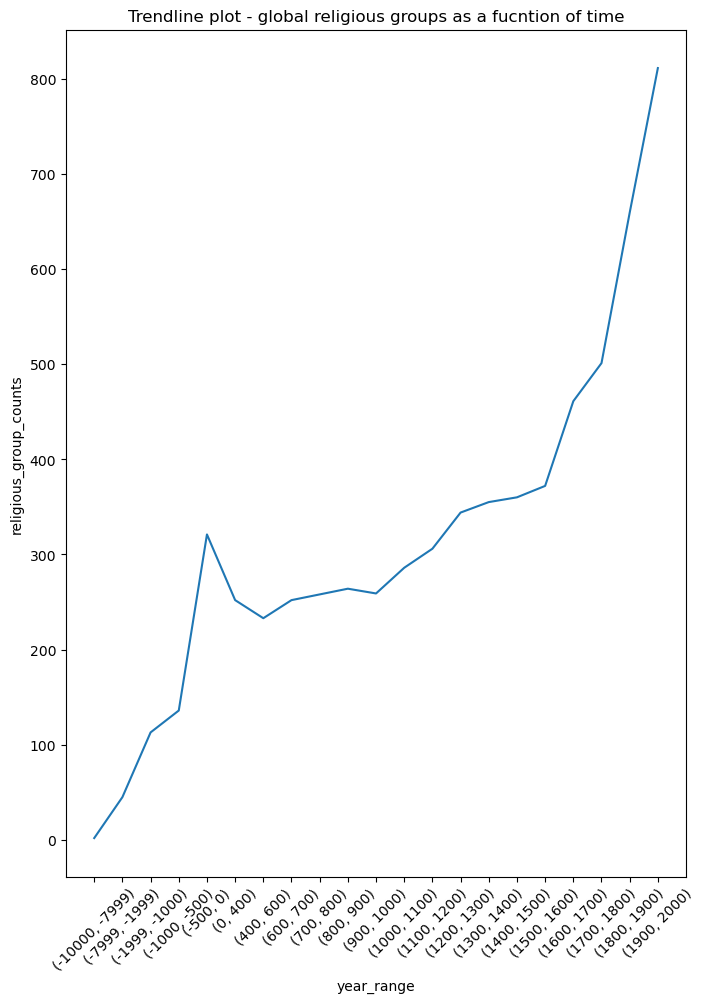

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'year_range': year_ranges,'religious_group_counts': group_counts_by_year})
df['year_range'] = df['year_range'].apply(lambda x: str(x))
fig1 = plt.gcf()
plt.figure(figsize=(8, 11))
fig1 = sns.lineplot(df, x = 'year_range', y = 'religious_group_counts')

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.title("Trendline plot - global religious groups as a fucntion of time")

# Adjust figure size if needed

plt.savefig('religion_trendline.png')
# Show the plot
plt.show()
